In [128]:
import pandas as pd
from sklearn.model_selection import train_test_split

from collections import Counter
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

In [5]:
#Import dataset
dfs10_user = pd.read_csv('/Users/lamga/OneDrive/IOD Lessons/Projects/Extract IG influencer dataset/dfs10user.csv')

In [9]:
dfs10_user.head()

,influencer,captions,tokens,no_hashtag,hashtag,Category,tier,Labels
0,00s_supermodels,#FashionEditorial Scan By Me #IngaSavits for E...,fashioneditorial scan by me ingasavits for ell...,#FashionEditorial Scan By Me #IngaSavits for E...,#FashionEditorial #IngaSavits #ELLE #magazine ...,fashion,Nano,2.0
1,0720_b,# # # # # Eternal Beauty # # # estinaofficial...,eternal beauty estinaofficial rosemont santama...,# # # # # Eternal Beauty # # # estinaofficial...,#ROSEMONT #santamarianovella #bodylotion #body...,fashion,Micro,2.0
2,0821_me,X 30 httpwwwwemakepricecomdealadeal4079242 # ...,x 30 httpwwwwemakepricecomdealadeal4079242 ad ...,X 30 httpwwwwemakepricecomdealadeal4079242 # ...,#AD #ORT #oxfordreadingtree #Hmall #1 #EM #EM ...,food,Mid-tier,3.0
3,1000manerasdevestir,Vamos a por esta mini semana estrenando total ...,vamos a por esta mini semana estrenando total ...,Vamos a por esta mini semana estrenando total ...,#fashionblogger #1000manerasdevestir #adagatti...,fashion,Micro,2.0
4,100pintas,Mais um mood natalcio #coolkids #fashionkids #...,mais um mood natalcio coolkids fashionkids por...,Mais um mood natalcio #coolkids #fashionkids #...,#coolkids #fashionkids #portuguesebrands #kids...,family,Nano,1.0


In [7]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
dfs10_user['Labels'] = ord_enc.fit_transform(dfs10_user[['Category']])

In [8]:
#Check labels assigned
dfs10_user.groupby(['Category'])['Labels'].first()

Category
beauty     0.0
family     1.0
fashion    2.0
food       3.0
travel     4.0
Name: Labels, dtype: float64

In [59]:
## split the dataset
import re
Xt = dfs10_user['tokens']
Xh = dfs10_user['hashtag'].apply(str).apply(lambda x: re.sub('#','',x))
y = dfs10_user['Labels']

Xt_train, Xt_test, y_train, y_test = train_test_split(Xt, y, test_size = 0.2, random_state = 42, stratify=y)
Xh_train, Xh_test, y_train, y_test = train_test_split(Xh, y, test_size = 0.2, random_state = 42, stratify=y)

In [60]:
Xt

0        fashioneditorial scan by me ingasavits for ell...
1        eternal beauty estinaofficial rosemont santama...
2        x 30 httpwwwwemakepricecomdealadeal4079242 ad ...
3        vamos a por esta mini semana estrenando total ...
4        mais um mood natalcio coolkids fashionkids por...
                               ...                        
23369    when my link up with s it only a matter of tim...
23370    new store isabemarant messytable sunday threeofus
23371    im looking smug because i legit have four pack...
23372    lazyweekends zydacreations sale designer easte...
23373    the most important thing in life is to know wh...
Name: tokens, Length: 23374, dtype: object

In [61]:
Xh

0        FashionEditorial IngaSavits ELLE magazine ELLE...
1        ROSEMONT santamarianovella bodylotion bodywash...
2         AD ORT oxfordreadingtree Hmall 1 EM EM sponsored
3        fashionblogger 1000manerasdevestir adagatti st...
4        coolkids fashionkids portuguesebrands kids fas...
                               ...                        
23369    InternationalWomensDay BlackGirlMagic AlphaBab...
23370              isabemarant messytable sunday threeofus
23371                                                  nan
23372    zydacreations sale designer mumbai south appoi...
23373    northsea vitaminsea light sunset me memyselfan...
Name: hashtag, Length: 23374, dtype: object

In [62]:
y.shape

(23374,)

## Feature Engineering

### Count Vectors as features

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [63]:
# create a count vectorizer object
count_vect_t = CountVectorizer(token_pattern = r'\w{1,}')
count_vect_h = CountVectorizer(token_pattern = r'\w{1,}')

# Learn a vocabulary dictionary of all tokens in the raw documents
#count_vect.fit(dfs10_user['tokens'])

# Transform documents to document-term matrix.
Xt_train_count = count_vect_t.fit_transform(Xt_train)
Xt_test_count = count_vect_t.transform(Xt_test)

Xh_train_count = count_vect_h.fit_transform(Xh_train)
Xh_test_count = count_vect_h.transform(Xh_test)

In [64]:
Xt_train

17720    small yet elegant abbey on the hill picturesqu...
3889     mom this is amazing you have to try this say l...
6584     i found my castle in cinderella cenerentola di...
13002    every morning you have two choice stay asleep ...
7925     first stop home typically order something alon...
                               ...                        
14008    mulledwine dessert foodandwine marthabakes isr...
21001    i cant believe im getting a closeup view of th...
13373    running into the weekend like this meetthemome...
17270    alla prima che indovina che video scemo ho app...
1430     she got mad hustle and a dope soul bossbabe uh...
Name: tokens, Length: 18699, dtype: object

In [65]:
Xh_train

17720    lovefife scotlandisnow scotlandtraveloholic vi...
3889     cookingwithkids kidsinthekitchen cookingwithki...
6584     cinderella cenerentola disney waltdisney cospl...
13002    weddingdress sunrise dreams couple love dirtyb...
7925                           notsponsored likeschocolate
                               ...                        
14008    mulledwine dessert foodandwine marthabakes isr...
21001    hosted destinationmoon heinzhistorycenter hist...
13373    meetthemoment meetthemoment superitaly italian...
17270    makeup makeuptips makeuplover makeuplovers mak...
1430     bossbabe amrezy abh highlighter glow horsesofi...
Name: hashtag, Length: 18699, dtype: object

In [66]:
Xt_test_count.shape

(4675, 312580)

In [67]:
Xh_test_count.shape

(4675, 214667)

In [68]:
count_vect_t.get_feature_names()

['0',
 '00',
 '000',
 '0000',
 '0001',
 '00017',
 '0002',
 '00047',
 '0009',
 '001',
 '0015',
 '0017with',
 '002',
 '0025',
 '0029',
 '003',
 '004',
 '0040',
 '0048',
 '004light',
 '005',
 '007',
 '008',
 '009',
 '00s',
 '00sfashion',
 '01',
 '010',
 '0100',
 '0100018557',
 '0101',
 '010101',
 '010119',
 '0102',
 '01032019',
 '01065072342',
 '0107',
 '0108',
 '011',
 '0110',
 '01102017',
 '011117',
 '0115',
 '0117',
 '012',
 '012018',
 '012019',
 '012365',
 '01248',
 '01272019',
 '0138',
 '0151',
 '016',
 '01603',
 '01608',
 '017',
 '018',
 '01869156',
 '019cup',
 '01anodesuellenmand',
 '02',
 '020',
 '0201',
 '0202',
 '02032019',
 '02038615605',
 '0206',
 '02062019',
 '0210',
 '021018',
 '021218',
 '02126603556',
 '0214',
 '0218',
 '021rio',
 '022',
 '022015mix',
 '022018',
 '022419',
 '0228',
 '023',
 '024',
 '024496622',
 '02574',
 '026',
 '026455455',
 '026455466',
 '027',
 '028',
 '02light',
 '03',
 '030',
 '0301',
 '030218',
 '0303',
 '03052018',
 '031716',
 '032',
 '0322',
 '032

### TF-IDF Vectors as features
- Word level
- N-Gram level

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [70]:
%%time
# word level tf-idf
tfidf_vect_t = TfidfVectorizer(analyzer = 'word',
                             token_pattern = r'\w{1,}',
                             max_features = 5000)
tfidf_vect_h = TfidfVectorizer(analyzer = 'word',
                             token_pattern = r'\w{1,}',
                             max_features = 5000)
print(tfidf_vect_t)
print(tfidf_vect_h)

tfidf_vect_t.fit(Xt)
tfidf_vect_h.fit(Xh)

Xt_train_tfidf = tfidf_vect_t.transform(Xt_train)
Xt_test_tfidf  = tfidf_vect_t.transform(Xt_test)

Xh_train_tfidf = tfidf_vect_h.transform(Xh_train)
Xh_test_tfidf  = tfidf_vect_h.transform(Xh_test)

TfidfVectorizer(max_features=5000, token_pattern='\\w{1,}')
TfidfVectorizer(max_features=5000, token_pattern='\\w{1,}')
CPU times: user 11.5 s, sys: 343 ms, total: 11.9 s
Wall time: 11.9 s


In [71]:
%%time
# ngram level tf-idf
tfidf_vect_ngram = TfidfVectorizer(analyzer = 'word',
                                   token_pattern = r'\w{1,}',
                                   ngram_range = (2, 3),
                                   max_features = 5000)
print(tfidf_vect_ngram)

tfidf_vect_ngram.fit(Xt)
X_train_tfidf_ngram = tfidf_vect_ngram.transform(Xt_train)
X_test_tfidf_ngram  = tfidf_vect_ngram.transform(Xt_test)

TfidfVectorizer(max_features=5000, ngram_range=(2, 3), token_pattern='\\w{1,}')
CPU times: user 49.6 s, sys: 2.74 s, total: 52.3 s
Wall time: 52.6 s


In [72]:
## helper function
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
def train_model(classifier, feature_vector_train, label, feature_vector_valid, label_valid):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    #precision,recall,fscore,support = score(label_valid,  predictions, average=None)
          
    return f1_score(predictions,y_test,average='weighted'), classification_report(label_valid,  predictions, digits=3)

In [73]:
#choose f1 as data is most likely to be imbalanced classification 

In [74]:
# Keep the accuracy results in a dataframe
results = pd.DataFrame(columns = ['Count Vectors',
                                  'WordLevel TF-IDF',
                                  'N-Gram Vectors'])

### Naive Bayes Classifier

In [75]:
%%time
from sklearn.naive_bayes import MultinomialNB
# Naive Bayes on Count Vectors
score, report = train_model(MultinomialNB(), Xt_train_count, y_train, Xt_test_count, y_test)
print('NB, Count Vectors on tokens    : %.4f\n' % score)
print(report)

NB, Count Vectors on tokens    : 0.7568

              precision    recall  f1-score   support

         0.0      0.805     0.364     0.501       283
         1.0      0.661     0.689     0.675       732
         2.0      0.731     0.898     0.806      2224
         3.0      0.906     0.757     0.825       649
         4.0      0.773     0.501     0.608       787

    accuracy                          0.747      4675
   macro avg      0.775     0.642     0.683      4675
weighted avg      0.756     0.747     0.736      4675

CPU times: user 68.4 ms, sys: 36.6 ms, total: 105 ms
Wall time: 134 ms


In [76]:
results.loc['Naïve Bayes','Count Vectors'] = score

In [82]:
%%time
from sklearn.naive_bayes import MultinomialNB
# Naive Bayes on Count Vectors
score, report = train_model(MultinomialNB(), Xh_train_count, y_train, Xh_test_count, y_test)
print('NB, Count Vectors on hashtags    : %.4f\n' % score)
print(report)

NB, Count Vectors on hashtags    : 0.7235

              precision    recall  f1-score   support

         0.0      0.730     0.488     0.585       283
         1.0      0.704     0.523     0.600       732
         2.0      0.694     0.879     0.776      2224
         3.0      0.843     0.684     0.755       649
         4.0      0.700     0.535     0.607       787

    accuracy                          0.714      4675
   macro avg      0.734     0.622     0.664      4675
weighted avg      0.720     0.714     0.705      4675

CPU times: user 37.7 ms, sys: 12.2 ms, total: 49.9 ms
Wall time: 48.9 ms


In [78]:
results.loc['Naïve Bayes #','Count Vectors'] = score

In [80]:
# Naive Bayes on Count Vectors
score, report = train_model(MultinomialNB(), Xt_train_tfidf, y_train, Xt_test_tfidf, y_test)
print('NB, Count Vectors on tokens    : %.4f\n' % score)
print(report)

NB, Count Vectors on tokens    : 0.7588

              precision    recall  f1-score   support

         0.0      0.817     0.410     0.546       283
         1.0      0.750     0.596     0.664       732
         2.0      0.706     0.931     0.803      2224
         3.0      0.913     0.729     0.811       649
         4.0      0.794     0.506     0.618       787

    accuracy                          0.747      4675
   macro avg      0.796     0.634     0.688      4675
weighted avg      0.763     0.747     0.736      4675



In [81]:
results.loc['Naïve Bayes','WordLevel TF-IDF'] = score

In [83]:
# Naive Bayes on Count Vectors
score, report = train_model(MultinomialNB(), Xh_train_tfidf, y_train, Xh_test_tfidf, y_test)
print('NB, Count Vectors on hashtags    : %.4f\n' % score)
print(report)
results.loc['Naïve Bayes #','WordLevel TF-IDF'] = score

NB, Count Vectors on hashtags    : 0.7135

              precision    recall  f1-score   support

         0.0      0.799     0.449     0.575       283
         1.0      0.726     0.417     0.530       732
         2.0      0.653     0.918     0.763      2224
         3.0      0.882     0.624     0.731       649
         4.0      0.750     0.484     0.588       787

    accuracy                          0.697      4675
   macro avg      0.762     0.578     0.637      4675
weighted avg      0.721     0.697     0.681      4675



In [84]:
# Naive Bayes on Count Vectors
score, report = train_model(MultinomialNB(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram, y_test)
print('NB, Count Vectors on tokens    : %.4f\n' % score)
print(report)
results.loc['Naïve Bayes','N-Gram Vectors'] = score

NB, Count Vectors on tokens    : 0.6819

              precision    recall  f1-score   support

         0.0      0.939     0.163     0.277       283
         1.0      0.729     0.426     0.538       732
         2.0      0.608     0.938     0.738      2224
         3.0      0.864     0.519     0.649       649
         4.0      0.655     0.316     0.427       787

    accuracy                          0.648      4675
   macro avg      0.759     0.472     0.526      4675
weighted avg      0.691     0.648     0.614      4675



### Support Vector Machine

In [88]:
%%time
from sklearn.svm import LinearSVC
# Support Vector Machine on Count Vectors 
score,report = train_model(LinearSVC(C=1), Xt_train_count, y_train, Xt_test_count, y_test)
print('SVM, Count Vectors on tokens    : %.4f\n' % score)
print(report)
#note that changing c parameters doesn't help
results.loc['SVM','Count Vectors'] = score

SVM, Count Vectors on tokens    : 0.7017

              precision    recall  f1-score   support

         0.0      0.578     0.484     0.527       283
         1.0      0.608     0.575     0.591       732
         2.0      0.730     0.802     0.764      2224
         3.0      0.802     0.735     0.767       649
         4.0      0.630     0.568     0.597       787

    accuracy                          0.698      4675
   macro avg      0.670     0.633     0.649      4675
weighted avg      0.695     0.698     0.695      4675

CPU times: user 13.2 s, sys: 51 ms, total: 13.2 s
Wall time: 13.2 s


/opt/anaconda3/envs/nlp21v0/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [89]:
%%time
from sklearn.svm import LinearSVC
# Support Vector Machine on Count Vectors 
score,report = train_model(LinearSVC(C=1), Xh_train_count, y_train, Xh_test_count, y_test)
print('SVM, Count Vectors on tokens    : %.4f\n' % score)
print(report)
#note that changing c parameters doesn't help
results.loc['SVM #','Count Vectors'] = score

SVM, Count Vectors on tokens    : 0.6689

              precision    recall  f1-score   support

         0.0      0.585     0.438     0.501       283
         1.0      0.625     0.419     0.502       732
         2.0      0.645     0.859     0.737      2224
         3.0      0.797     0.562     0.659       649
         4.0      0.637     0.446     0.525       787

    accuracy                          0.654      4675
   macro avg      0.658     0.545     0.585      4675
weighted avg      0.658     0.654     0.639      4675

CPU times: user 2.63 s, sys: 24.4 ms, total: 2.65 s
Wall time: 2.65 s


In [93]:
%%time
# Support Vector Machine on Ngram Level TF IDF Vectors
score,report = train_model(LinearSVC(), Xt_train_tfidf, y_train, Xt_test_tfidf, y_test)
print('SVM, WordLevel TF-IDF   : %.4f\n' % score)
print(report)

SVM, WordLevel TF-IDF   : 0.7498

              precision    recall  f1-score   support

         0.0      0.758     0.498     0.601       283
         1.0      0.681     0.628     0.654       732
         2.0      0.759     0.847     0.801      2224
         3.0      0.838     0.797     0.817       649
         4.0      0.676     0.615     0.644       787

    accuracy                          0.746      4675
   macro avg      0.743     0.677     0.703      4675
weighted avg      0.744     0.746     0.742      4675

CPU times: user 1.02 s, sys: 7.51 ms, total: 1.03 s
Wall time: 1.03 s


In [94]:
results.loc['SVM','WordLevel TF-IDF'] = score

In [95]:
%%time
# Support Vector Machine on Ngram Level TF IDF Vectors
score,report = train_model(LinearSVC(), Xh_train_tfidf, y_train, Xh_test_tfidf, y_test)
print('SVM, WordLevel TF-IDF   : %.4f\n' % score)
print(report)
results.loc['SVM #','WordLevel TF-IDF'] = score

SVM, WordLevel TF-IDF   : 0.6886

              precision    recall  f1-score   support

         0.0      0.707     0.477     0.570       283
         1.0      0.617     0.436     0.511       732
         2.0      0.663     0.869     0.752      2224
         3.0      0.808     0.615     0.698       649
         4.0      0.665     0.473     0.553       787

    accuracy                          0.676      4675
   macro avg      0.692     0.574     0.617      4675
weighted avg      0.679     0.676     0.662      4675

CPU times: user 243 ms, sys: 3.54 ms, total: 247 ms
Wall time: 246 ms


In [92]:
%%time
# Support Vector Machine on Ngram Level TF IDF Vectors
score,report = train_model(LinearSVC(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram, y_test)
print('SVM, N-Gram Vectors   : %.4f\n' % score)
print(report)

SVM, N-Gram Vectors   : 0.6460

              precision    recall  f1-score   support

         0.0      0.650     0.322     0.430       283
         1.0      0.580     0.527     0.553       732
         2.0      0.659     0.795     0.721      2224
         3.0      0.766     0.609     0.678       649
         4.0      0.501     0.427     0.461       787

    accuracy                          0.637      4675
   macro avg      0.631     0.536     0.568      4675
weighted avg      0.634     0.637     0.627      4675

CPU times: user 903 ms, sys: 11.9 ms, total: 914 ms
Wall time: 913 ms


In [96]:
results.loc['SVM','N-Gram Vectors'] = score

### Bagging Models

In [99]:
%%time
from sklearn.ensemble import RandomForestClassifier
# Bagging (Random Forest) on Count Vectors
score, report = train_model(RandomForestClassifier(n_estimators = 100, class_weight='balanced_subsample'), Xt_train_count, y_train, Xt_test_count, y_test)
print('RF, Count Vectors    : %.4f\n' % score)
print(report)

RF, Count Vectors    : 0.7103

              precision    recall  f1-score   support

         0.0      0.908     0.279     0.427       283
         1.0      0.795     0.403     0.535       732
         2.0      0.609     0.967     0.747      2224
         3.0      0.905     0.664     0.766       649
         4.0      0.924     0.248     0.391       787

    accuracy                          0.674      4675
   macro avg      0.828     0.512     0.573      4675
weighted avg      0.750     0.674     0.637      4675

CPU times: user 1min 39s, sys: 619 ms, total: 1min 39s
Wall time: 1min 43s


In [100]:
results.loc['Random Forest','Count Vectors'] = score

In [101]:
%%time
# Bagging (Random Forest) on Count Vectors
score, report = train_model(RandomForestClassifier(n_estimators = 100, class_weight='balanced_subsample'), Xh_train_count, y_train, Xh_test_count, y_test)
print('RF, Count Vectors    : %.4f\n' % score)
print(report)
results.loc['Random Forest #','Count Vectors'] = score

RF, Count Vectors    : 0.6799

              precision    recall  f1-score   support

         0.0      0.640     0.364     0.464       283
         1.0      0.690     0.362     0.475       732
         2.0      0.630     0.894     0.739      2224
         3.0      0.761     0.612     0.678       649
         4.0      0.709     0.409     0.519       787

    accuracy                          0.658      4675
   macro avg      0.686     0.528     0.575      4675
weighted avg      0.672     0.658     0.636      4675

CPU times: user 1min 25s, sys: 603 ms, total: 1min 26s
Wall time: 1min 26s


In [102]:
%%time
# Bagging (Random Forest) on Word Level TF IDF Vectors
score, report = train_model(RandomForestClassifier(n_estimators = 100), Xt_train_tfidf, y_train, Xt_test_tfidf, y_test)
print('RF, WordLevel TF-IDF : %.4f\n' % score)
print(report)
results.loc['Random Forest','WordLevel TF-IDF'] = score

RF, WordLevel TF-IDF : 0.7412

              precision    recall  f1-score   support

         0.0      0.867     0.322     0.469       283
         1.0      0.768     0.519     0.619       732
         2.0      0.667     0.942     0.781      2224
         3.0      0.892     0.738     0.808       649
         4.0      0.833     0.419     0.558       787

    accuracy                          0.722      4675
   macro avg      0.805     0.588     0.647      4675
weighted avg      0.754     0.722     0.703      4675

CPU times: user 43.9 s, sys: 278 ms, total: 44.2 s
Wall time: 44.2 s


In [104]:
%%time
# Bagging (Random Forest) on Word Level TF IDF Vectors
score, report = train_model(RandomForestClassifier(n_estimators = 100), Xh_train_tfidf, y_train, Xh_test_tfidf, y_test)
print('RF, WordLevel TF-IDF : %.4f\n' % score)
print(report)
results.loc['Random Forest #','WordLevel TF-IDF'] = score

RF, WordLevel TF-IDF : 0.6825

              precision    recall  f1-score   support

         0.0      0.714     0.389     0.503       283
         1.0      0.656     0.411     0.505       732
         2.0      0.641     0.880     0.742      2224
         3.0      0.810     0.602     0.691       649
         4.0      0.672     0.447     0.537       787

    accuracy                          0.666      4675
   macro avg      0.698     0.546     0.596      4675
weighted avg      0.676     0.666     0.649      4675

CPU times: user 21.5 s, sys: 92.8 ms, total: 21.6 s
Wall time: 21.7 s


In [106]:
%%time
# Bagging (Random Forest) on Ngram Level TF IDF Vectors
score, report = train_model(RandomForestClassifier(n_estimators = 100), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram, y_test)
print('RF, N-Gram Vectors   : %.4f\n' % score)
print(report)
results.loc['Random Forest','N-Gram Vectors'] = score

RF, N-Gram Vectors   : 0.6645

              precision    recall  f1-score   support

         0.0      0.753     0.226     0.348       283
         1.0      0.673     0.369     0.477       732
         2.0      0.583     0.936     0.718      2224
         3.0      0.821     0.536     0.649       649
         4.0      0.600     0.149     0.238       787

    accuracy                          0.616      4675
   macro avg      0.686     0.443     0.486      4675
weighted avg      0.643     0.616     0.568      4675

CPU times: user 52.2 s, sys: 371 ms, total: 52.5 s
Wall time: 52.5 s


In [112]:
rfc=RandomForestClassifier(random_state=42)
#Apply grid search on WordLevel TF_IDF
param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10,13,15,20],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(Xt_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 13, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 500]})

In [113]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 500}

In [114]:
best_grid = CV_rfc.best_estimator_

In [115]:
%%time
# Bagging (Random Forest) on Word Level TF IDF Vectors
score, report = train_model(best_grid, Xt_train_tfidf, y_train, Xt_test_tfidf, y_test)
print('RF, WordLevel TF-IDF : %.4f\n' % score)
print(report)
results.loc['Random Forest','WordLevel TF-IDF'] = score

RF, WordLevel TF-IDF : 0.7211

              precision    recall  f1-score   support

         0.0      0.882     0.265     0.408       283
         1.0      0.823     0.419     0.556       732
         2.0      0.618     0.974     0.756      2224
         3.0      0.926     0.696     0.795       649
         4.0      0.915     0.260     0.406       787

    accuracy                          0.686      4675
   macro avg      0.833     0.523     0.584      4675
weighted avg      0.759     0.686     0.650      4675

CPU times: user 48.2 s, sys: 533 ms, total: 48.7 s
Wall time: 48.8 s


### Boosting Models

In [117]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [121]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [122]:
%%time
# Gradient Boosting on Count Vectors
score,report = train_model(XGBClassifier(objective="multi:softprob", random_state=42, use_label_encoder=False), Xt_train_count, y_train, Xt_test_count, y_test)
print('XGB, Count Vectors    : %.4f\n' % score)
print(report)
results.loc['XGBoost','Count Vectors'] = score

[05:36:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB, Count Vectors    : 0.7608

              precision    recall  f1-score   support

           0      0.776     0.452     0.571       283
           1      0.750     0.601     0.667       732
           2      0.722     0.904     0.803      2224
           3      0.872     0.769     0.817       649
           4      0.776     0.559     0.650       787

    accuracy                          0.752      4675
   macro avg      0.779     0.657     0.702      4675
weighted avg      0.760     0.752     0.744      4675

CPU times: user 5min 51s, sys: 20.3 s, total: 6min 11s
Wall time: 53.3 s


In [123]:
%%time
# Gradient Boosting on Count Vectors
score,report = train_model(XGBClassifier(objective="multi:softprob", random_state=42, use_label_encoder=False), Xh_train_count, y_train, Xh_test_count, y_test)
print('XGB, Count Vectors    : %.4f\n' % score)
print(report)
results.loc['XGBoost #','Count Vectors'] = score

[05:38:02] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB, Count Vectors    : 0.6916

              precision    recall  f1-score   support

           0      0.734     0.410     0.526       283
           1      0.732     0.347     0.471       732
           2      0.619     0.934     0.745      2224
           3      0.871     0.550     0.674       649
           4      0.767     0.396     0.523       787

    accuracy                          0.667      4675
   macro avg      0.745     0.527     0.588      4675
weighted avg      0.704     0.667     0.641      4675

CPU times: user 1min 59s, sys: 11.9 s, total: 2min 11s
Wall time: 20.1 s


In [124]:
%%time
# Gradient Boosting on Word TF-IDF Vectors
score,report = train_model(XGBClassifier(objective="multi:softprob", random_state=42, use_label_encoder=False), Xt_train_tfidf, y_train, Xt_test_tfidf, y_test)
print('XGB, WordLevel TF-IDF    : %.4f\n' % score)
print(report)
results.loc['XGBoost','WordLevel TF-IDF'] = score

[05:39:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB, WordLevel TF-IDF    : 0.7535

              precision    recall  f1-score   support

           0      0.803     0.445     0.573       283
           1      0.741     0.602     0.665       732
           2      0.720     0.893     0.797      2224
           3      0.873     0.764     0.815       649
           4      0.729     0.553     0.629       787

    accuracy                          0.745      4675
   macro avg      0.773     0.652     0.696      4675
weighted avg      0.751     0.745     0.737      4675

CPU times: user 9min 4s, sys: 9.91 s, total: 9min 14s
Wall time: 1min 17s


In [134]:
## Hyper Parameter Optimisation

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}


In [137]:
#timeit
def generate_model_from_search(grid_or_random, model, parameters, scorer, X, y):
    
    if grid_or_random == 'Grid':
        search_obj = GridSearchCV(model, parameters, scoring=scorer)
    elif grid_or_random == 'Random':
        search_obj = RandomizedSearchCV(model, parameters, scoring=scorer, n_jobs=-1, cv=5, verbose=3)
    fit_obj = search_obj.fit(X,y)
    best_clf = fit_obj.best_estimator_
    
    return best_clf

In [138]:
best_model_grid=generate_model_from_search('Random', XGBClassifier(), params, 'roc_auc', Xt_train_tfidf, y_train)
best_model_grid

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/anaconda3/envs/nlp21v0/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/anaconda3/envs/nlp21v0/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/opt/anaconda3/envs/nlp21v0/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:15:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [141]:
best_model_grid=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.2, max_delta_step=0, max_depth=15,
               min_child_weight=5, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=1,
               objective='multi:softprob', random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=None, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None)

In [143]:
cv_score = cross_val_score(best_model_grid, Xt_train_tfidf, y_train, cv=5, scoring='f1_macro')
cv_score.mean()

/opt/anaconda3/envs/nlp21v0/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:32:52] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/nlp21v0/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:33:36] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/nlp21v0/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:34:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/nlp21v0/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:35:04] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/nlp21v0/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:35:48] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6918408626799272

In [144]:
score,report = train_model(best_model_grid, Xt_train_tfidf, y_train, Xt_test_tfidf, y_test)
print('XGB, WordLevel TF-IDF    : %.4f\n' % score)
print(report)

/opt/anaconda3/envs/nlp21v0/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:39:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB, WordLevel TF-IDF    : 0.7631

              precision    recall  f1-score   support

           0      0.816     0.424     0.558       283
           1      0.784     0.598     0.679       732
           2      0.721     0.914     0.806      2224
           3      0.877     0.766     0.817       649
           4      0.747     0.554     0.636       787

    accuracy                          0.754      4675
   macro avg      0.789     0.651     0.699      4675
weighted avg      0.762     0.754     0.744      4675



In [148]:
results.loc['XGBoost','WordLevel TF-IDF'] = score

In [147]:
best_model_grid.fit(Xt_train_tfidf, y_train)
best_train_predictions = best_model_grid.predict(Xt_train_tfidf)
best_test_predictions = best_model_grid.predict(Xt_test_tfidf)

#Calculate the f1_score of the new model
print('The training F1 Score is', f1_score(best_train_predictions, y_train, average='weighted'))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test, average='weighted'))

/opt/anaconda3/envs/nlp21v0/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:44:12] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The training F1 Score is 0.9658965539674493
The testing F1 Score is 0.7631382104508663


In [ ]:
#There seems to be significant overfitting

In [149]:
results

,Count Vectors,WordLevel TF-IDF,N-Gram Vectors
Naïve Bayes,0.75683,0.758822,0.68195
Naïve Bayes #,0.723517,0.713468,NaN
SVM,0.701668,0.749771,0.688632
SVM #,0.668897,0.688632,NaN
Random Forest,0.710325,0.721082,0.664517
Random Forest #,0.679868,0.682525,NaN
XGBoost,0.760795,0.763138,NaN
XGBoost #,0.69157,NaN,NaN


In [157]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(best_test_predictions, y_test)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[ 120    1   21    3    2]
 [   3  438   64   21   33]
 [ 150  242 2032  101  293]
 [   3   17   27  497   23]
 [   7   34   80   27  436]]


Text(0.5, 15.0, 'Predict')

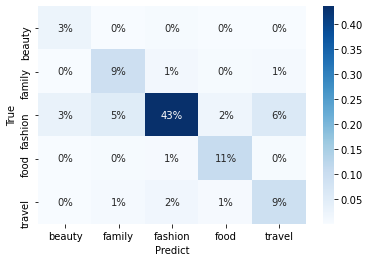

In [237]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
categories = ['beauty', 'family', 'fashion', 'food', 'travel']
sns.heatmap(confusion/np.sum(confusion), 
            annot=True, fmt='.0%',
            xticklabels=categories,
            yticklabels=categories,
            cmap='Blues')
plt.ylabel('True')
plt.xlabel('Predict')

In [238]:
y_test.value_counts()

2    2224
4     787
1     732
3     649
0     283
Name: Labels, dtype: int64

In [239]:
len(y_test)

4675

In [193]:
# Binarize the output
from sklearn.preprocessing import label_binarize
y_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_bin.shape[1]

In [194]:
y_bin.shape

(4675, 5)

In [195]:
Xt_test_tfidf.shape

(4675, 5000)

In [197]:
from sklearn.metrics import roc_curve, auc

y_score = best_model_grid.predict_proba(Xt_test_tfidf)

In [223]:
sum(y_score[1])

0.9999999804422259

In [202]:
y_score[:, 0].shape

(4675,)

In [211]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:,i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
#fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
#roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

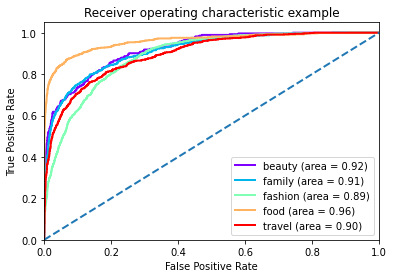

In [240]:
from matplotlib.pyplot import cm
plt.figure()
colors = color = cm.rainbow(np.linspace(0, 1, n_classes))

for i,c in zip(range(n_classes), colors):
    lw = 2
    plt.plot(fpr[i], tpr[i], color=c,
             lw=lw, label=f'{categories[i]} (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], color='C0', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Create proxy for consistency of post to influencer category (i.e. probability of category-matching post)

In [3]:
import pandas as pd
dfs10_en = pd.read_csv('/Users/lamga/OneDrive/IOD Lessons/Projects/Extract IG influencer dataset/dfs10enc.csv')

In [228]:
X_post = dfs10_en['tokens']

In [231]:
X_post

0         fashioneditorial scan by me ingasavits for ell...
1         runway scan by me valentino fallwinter 2000 mo...
2         runway claudiaschiffer balmain springsummer 20...
3         runway eugeniavolodina byblos springsummer 200...
4         runway picture credit marpercuov4l anastassiak...
                                ...                        
184996    happy birthday to me birthday 9 april me cynth...
184997    authentic humaneness kissesforagreatperson gir...
184998    h a p p y w e e k e n d picoftheday bestofthed...
184999    a day like any other routine happyday me lifes...
185000                       just now teamselfie teamfilter
Name: tokens, Length: 185001, dtype: object

In [232]:
%%time
# word level tf-idf

X_post_tfidf = tfidf_vect_t.transform(X_post)

CPU times: user 5 s, sys: 207 ms, total: 5.21 s
Wall time: 5.39 s


In [233]:
y_post = best_model_grid.predict_proba(X_post_tfidf)

In [235]:
y_post.shape

(185001, 5)

In [241]:
cat_dict = dict(zip(dfs10_user.influencer, dfs10_user.Labels))

In [10]:
category_dict = dict(zip(dfs10_user.influencer, dfs10_user.Category))

In [12]:
dfs10_en['influencer_cat'] = dfs10_en['influencer'].map(category_dict)

In [26]:
for index, category in enumerate(dfs10_en['influencer_cat']):
    dfs10_en.loc[index,'cat_prob'] =  dfs10_en.loc[index, category]

In [27]:
dfs10_en.T

,0,1,2,3,4,5,6,7,8,9,...,184991,184992,184993,184994,184995,184996,184997,184998,184999,185000
influencer,00s_supermodels,00s_supermodels,00s_supermodels,00s_supermodels,00s_supermodels,00s_supermodels,00s_supermodels,00s_supermodels,0720_b,0720_b,...,zyndl_lala,zyndl_lala,zyndl_lala,zyndl_lala,zyndl_lala,zyndl_lala,zyndl_lala,zyndl_lala,zyndl_lala,zyndl_lala
posts,1958951327024739292.info,1920139034731094095.info,1972039176098647705.info,1910085992241632962.info,1921244054184528243.info,1888606110610678282.info,2015426513809238627.info,1990872926047521173.info,1915333780593578285.info,1984251846920235391.info,...,1841565609613044300.info,1749225667477906796.info,1834803612959513600.info,1887714002751754531.info,1732133000164907416.info,1753783027169190481.info,1821632628576354559.info,1696346693367657579.info,1978918308767798491.info,1937599324781268346.info
image,"['1958950698725328921.jpg', '19589507028022564...",['1920139034731094095.jpg'],['1972039176098647705.jpg'],"['1910085220179415841.jpg', '19100852205317717...","['1921244032357699082.jpg', '19212440325926970...",['1888606110610678282.jpg'],"['2015426509371728143.jpg', '20154265093801461...",['1990872926047521173.jpg'],"['1915333755753748512.jpg', '19153337560557229...","['1984249360074381895.jpg', '19842493606026964...",...,['1841565609613044300.jpg'],['1749225667477906796.jpg'],['1834803612959513600.jpg'],['1887714002751754531.jpg'],['1732133000164907416.jpg'],['1753783027169190481.jpg'],['1821632628576354559.jpg'],['1696346693367657579.jpg'],['1978918308767798491.jpg'],['1937599324781268346.jpg']
contents,"{'gating_info': None, 'viewer_can_reshare': Tr...","{'gating_info': None, 'viewer_can_reshare': Tr...","{'gating_info': None, 'viewer_can_reshare': Tr...","{'gating_info': None, 'viewer_can_reshare': Tr...","{'gating_info': None, 'viewer_can_reshare': Tr...","{'gating_info': None, 'viewer_can_reshare': Tr...","{'gating_info': None, 'viewer_can_reshare': Tr...","{'gating_info': None, 'viewer_can_reshare': Tr...","{'gating_info': None, 'viewer_can_reshare': Tr...","{'gating_info': None, 'viewer_can_reshare': Tr...",...,{'edge_media_to_caption': {'edges': [{'node': ...,"{'viewer_has_saved_to_collection': False, 'acc...","{'viewer_has_liked': False, 'id': '18348036129...",{'accessibility_caption': 'Image may contain: ...,{'edge_web_media_to_related_media': {'edges': ...,"{'owner': {'is_unpublished': False, 'username'...","{'viewer_has_saved_to_collection': False, 'has...","{'taken_at_timestamp': 1516440305, 'owner': {'...",{'media_preview': 'ACoq6GmNTzTGoAy2nLTZClgnyA+...,{'tracking_token': 'eyJ2ZXJzaW9uIjo1LCJwYXlsb2...
captions,#FashionEditorial Scan By Me #IngaSavits for E...,#Runway Scan By Me #Valentino FallWinter 2000 ...,#Runway #ClaudiaSchiffer Balmain SpringSummer ...,#Runway #EugeniaVolodina Byblos SpringSummer 2...,#Runway pictures credit marpercuov4l #Anastass...,#Runway #EugeniaVolodina Douglas Hannant SS 20...,#FashionEditorials Scan By Me #AnjaRubik for #...,#FashionEditorial #KarolinaKurkova for NOVA Ma...,# # # # # Eternal Beauty # # # estinaofficial,# #ROSEMONT ## #### # # # # ###,...,The most important thing in life is to know wh...,YOLO #yolo #instadaily #life #lifestyle #happy...,Are you sure youve got it #sure #areyousure #t...,Stop leaving and you will arrive Stop searchi...,NORWAY Timeout Me myself and I #travel #travel...,Happy Birthday to ME #birthday #9 #april #me #...,authentic humaneness #kissesforagreatperson #g...,H A P P Y W E E K E N D #picoftheday #bestofth...,A day like any other #routine #happyday #me #l...,JUST now #teamselfie #teamfilter
comment_counts,0,0,0,2,0,0,2,3,9,0,...,1,0,2,0,11,33,9,24,5,0
comments,NaN,NaN,NaN,two heartsrevolving heartstwo hearts wow smili...,NaN,NaN,dreamy angel i want it so baddddddd,do you have her nova cover,연예인 꺄잘어울려용 난 언니 미모에 빠져 빠져two hearts 버렸어용 이쁘다 울...,NaN,...,NaN,NaN,red heartsun i liked your photo greeting from ...,NaN,red heart smiling face with hearteyes eine sch...,alles liebe smiling face

In [262]:
dfs10_cat = pd.DataFrame(y_post, columns=categories)

In [265]:
for i in range(5):
    dfs10_en[categories[i]] = dfs10_cat[categories[i]]

In [267]:
dfs10_en.head().T

,0,1,2,3,4
influencer,00s_supermodels,00s_supermodels,00s_supermodels,00s_supermodels,00s_supermodels
posts,1958951327024739292.info,1920139034731094095.info,1972039176098647705.info,1910085992241632962.info,1921244054184528243.info
image,"['1958950698725328921.jpg', '19589507028022564...",['1920139034731094095.jpg'],['1972039176098647705.jpg'],"['1910085220179415841.jpg', '19100852205317717...","['1921244032357699082.jpg', '19212440325926970..."
contents,"{'gating_info': None, 'viewer_can_reshare': Tr...","{'gating_info': None, 'viewer_can_reshare': Tr...","{'gating_info': None, 'viewer_can_reshare': Tr...","{'gating_info': None, 'viewer_can_reshare': Tr...","{'gating_info': None, 'viewer_can_reshare': Tr..."
captions,#FashionEditorial Scan By Me #IngaSavits for E...,#Runway Scan By Me #Valentino FallWinter 2000 ...,#Runway #ClaudiaSchiffer Balmain SpringSummer ...,#Runway #EugeniaVolodina Byblos SpringSummer 2...,#Runway pictures credit marpercuov4l #Anastass...
comment_counts,0,0,0,2,0
comments,NaN,NaN,NaN,two heartsrevolving heartstwo hearts wow smili...,NaN
likes,68,100,102,94,67
count_tags,1,4,1,2,1
verified_tags,0,3,1,1,0


In [28]:
dfs10_en.to_csv('/Users/lamga/OneDrive/IOD Lessons/Projects/Extract IG influencer dataset/dfs10enc.csv',index=False, header=True)